## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (merge on Mouse ID)
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = merge_df.loc[merge_df["Mouse ID"] == "g989", "Timepoint"]
print(duplicate_ID)


908     0
909     0
910     5
911     5
912    10
913    10
914    15
915    15
916    20
917    20
918    25
919    30
920    35
Name: Timepoint, dtype: int64


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()


1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_grouped = clean_df.groupby("Drug Regimen")

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_vol_mean = drug_grouped["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_grouped["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_grouped["Tumor Volume (mm3)"].var()
tumor_vol_std = drug_grouped["Tumor Volume (mm3)"].std()
tumor_vol_sem = drug_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drug_summary_df = pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_var,
    "Standard Deviation": tumor_vol_std,
    "SEM": tumor_vol_sem})

drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary_df

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = drug_grouped.agg({'Tumor Volume (mm3)' : ["mean", "median", "var", "std", "sem"]})

aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

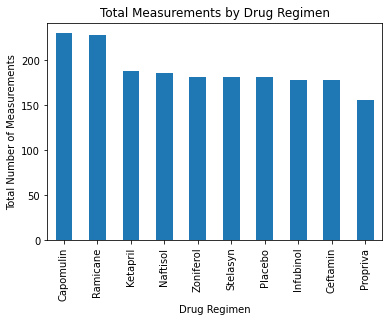

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_df["Drug Regimen"].value_counts()
#print(bar_plot)

bar_plot.plot.bar(
    xlabel = "Drug Regimen",
    ylabel = "Total Number of Measurements",
    title = "Total Measurements by Drug Regimen")


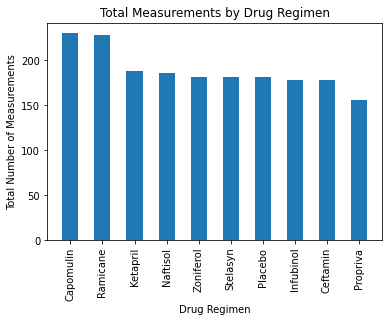

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(measurements))

# Create a bar chart based upon the above data
plt.bar(x_axis, measurements, align="center", width = 0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements.index, rotation = 90)

# Give the chart a title, x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title("Total Measurements by Drug Regimen")

plt.show()


Text(0, 0.5, '')

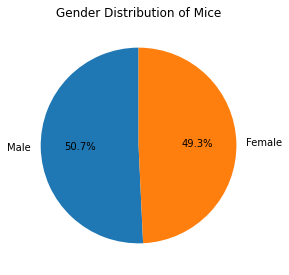

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df["Sex"].value_counts()

pie_plot = gender.plot.pie(autopct="%1.1f%%", startangle=90, title="Gender Distribution of Mice", figsize=(4.5,4.5))

#Remove y label
pie_plot.set_ylabel('')

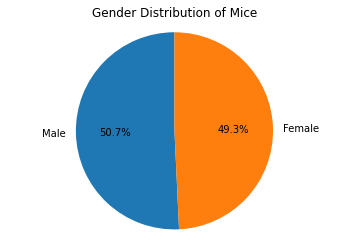

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index, autopct="%1.1f%%", startangle=90)

# Create Title
plt.title("Gender Distribution of Mice")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merged_df = max_timepoint_df.merge(clean_df, on="Mouse ID").rename(columns={"Timepoint_x": "Max_Timepoint", "Timepoint_y": "Timepoint"})
new_merged_df.head()

,Mouse ID,Max_Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# First, create loop to iterate through specific drugs named above
for drug in drugs:
        
    # Next locate the rows which contain mice on each drug
    specific_drug_df = new_merged_df.loc[new_merged_df["Drug Regimen"] == drug]
        
    # Add subset to capture the Max Timepoint for each mouse to identify the final tumor volume
    mouse_timepoint_df = specific_drug_df.loc[specific_drug_df["Timepoint"] == specific_drug_df["Max_Timepoint"]]
    
    # Append tumor volumes into empty list established before the loop in order to calculate IQR 
    tumor_values = mouse_timepoint_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_values)

    #Calculate IQR for each drug regimen
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"{drug} IQR is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, the lower bound is: {lower_bound}")
    print(f"For {drug}, the upper bound is: {upper_bound}")
    
    #Determine number of outliers
    outlier =[]
    for x in tumor_values:
        if ((x < lower_bound) or (x > upper_bound)):
             outlier.append(x)
    print(" Number of outliers:", len(outlier))

Capomulin IQR is: 7.781863460000004
For Capomulin, the lower bound is: 20.70456164999999
For Capomulin, the upper bound is: 51.83201549
 Number of outliers: 0
Ramicane IQR is: 9.098536719999998
For Ramicane, the lower bound is: 17.912664470000003
For Ramicane, the upper bound is: 54.30681135
 Number of outliers: 0
Infubinol IQR is: 11.477135160000003
For Infubinol, the lower bound is: 36.83290494999999
For Infubinol, the upper bound is: 82.74144559000001
 Number of outliers: 1
Ceftamin IQR is: 15.577752179999997
For Ceftamin, the lower bound is: 25.355449580000002
For Ceftamin, the upper bound is: 87.66645829999999
 Number of outliers: 0


Text(0, 0.5, 'Tumor Volume (mm3)')

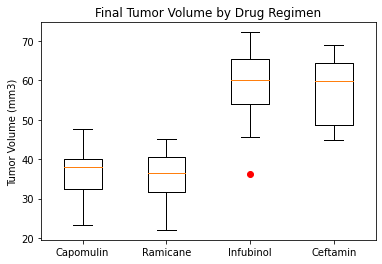

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Use subplot
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, sym="r")
plt.title("Final Tumor Volume by Drug Regimen")
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
